In [16]:
from Ngram import Ngram
import numpy as np 
import random
import math
from matplotlib import pyplot as pyplot
models = {}
for i in range(1,9):
    models[str(i)+'gram'] = Ngram(i)
model = Ngram(3)

In [24]:
def generate_ns(model,text_len):
        n = model.n
        context = ['<s>']*(n-1)
        res = [];i = 0;perp=0
        while i<text_len:
            wrd_probs={}
            con = tuple(context)
            for wrd in model.occurences[con]:
                wrd_probs[wrd] = prob_nosmooth(model,con,wrd)
            wrd = np.random.choice(list(wrd_probs.keys()),1,list(wrd_probs.values()))[0]
            if wrd == '</s>':
                if n!=-1:context = ['<s>']*(n-1)
                res.append('.')
            else:
                if n!=1:context.pop(0);context.append(wrd)
                perp+=math.log(prob_nosmooth(model,con,wrd))
                res.append(wrd)
                i+=1
        perp = math.exp(abs(perp/len(res)))
        return ' '.join(res),perp

def prob_nosmooth(model,cont,wrd):
        try:
            denom = float(model.occs_count[cont])
            temp = list(cont)
            temp.append(wrd)
            num = model.context_count[tuple(temp)]
            return num/denom
        except:
            return 0

def perplexity(model,sent):
        n = model.n
        if type(sent) == str:
            sent = sent.split()
        context = ['<s>']*(n-1)
        res = [];i = 0;perp=0
        for wrd in sent:
            con = tuple(context)
            if wrd == '.':
                if n!=1:context = ['<s>']*(n-1)
            else:
                if n!=1:context.pop(0);context.append(wrd)
                #try:
                  # pass
                  # If i put this under a try except block then the values of perplexity won't be accurate
                perp+=math.log(prob_nosmooth(model,con,wrd))
                #except:
                perp+=0
        perp = math.exp(abs(perp/len(res)))
        return ' '.join(res),perp

In [18]:
perplexity(model=model,sent = '''sparks began to chant expecto photo an enormous leap and the game ended in two weeks till full moon mr weasley back amongst them as unlikely as the fire beneath it an extra measure of him dipping his pen into some ink and a shower of red caps nasty little''')

('sparks began to chant expecto photo an enormous leap and the game ended in two weeks till full moon mr weasley back amongst them as unlikely as the fire beneath it an extra measure of him dipping his pen into some ink and a shower of red caps nasty little',
 6.3960781877943145)

In [19]:
avg_perp = []
for i in range(1,9):
    text,perp = generate_ns(models[str(i)+'gram'],50)
    print(f'MODEL : {i}gram\nGenerated text : \n{text}\nPerplexity = {perp}')
    perp = 0
    for j in range(50):
        perp += generate_ns(models[str(i)+'gram'],50)[1]
    avg_perp.append(perp/50)

MODEL : 1gram
Generated text : 
dishonor moony comparing doorknob babbling pounced mounting reform moderately bolted poverty numbness aaaah titles expert mirth climb incantatem minute’s outworn rigorous toadless striped clairvoyant inscrutable taught vibrating embarked nagging troubled twilfitt tracing agriculture longbottom’s briskly smock preferences mapped context squeakily saplings cropping holds tiara lunatics dursleys’d bracelets medicine sphinxes unimpressed
Perplexity = 324553.8100024698
MODEL : 2gram
Generated text : 
spew ron stammered professor gilderoy pulled in fully clothed hunched over grounds descended upon katie must finish handle again clutching two translations and poor results — perfect map . project for people come read due to borgin that working rather horsey face just leaves mr dursley yeh really too thick blond
Perplexity = 181.33297920069995
MODEL : 3gram
Generated text : 
neighborhood children all around for her to finish me off and climb up there yet . doesn’

In [20]:
print(avg_perp)

[235098.23779748895, 174.43363360281919, 9.139068371812021, 3.056961645416453, 2.4166915838010947, 2.3762041767095563, 2.3054229842824023, 2.5107971764360153]


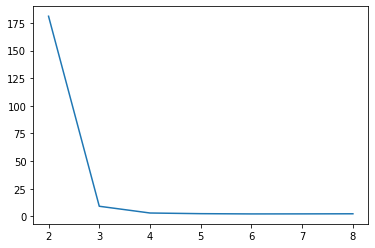

In [35]:
pyplot.plot([i+1 for i in range(1,8)],avg_perp[1:])

There's a sharp derease in perplexity values from 1gram to 2 gram as expected

Also, from 2gram to 3gram because 2grams are still quite ineffective at capturing context

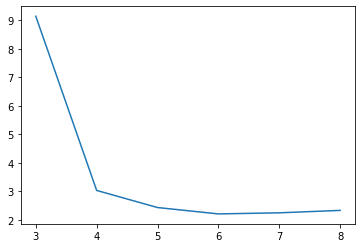

In [36]:
pyplot.plot([i+1 for i in range(2,8)],avg_perp[2:])

Lower perplexities for 3,4,5... grams can be explained by the fact that longer ngrams can capture more context

But they copy texts from the corpus 

In [25]:
def test(model):
    rand = np.random.randint(0,len(model.test),10)
    for i in rand:
        print(' '.join(model.test[i]))
        print(perplexity(model,model.test[i]))
test(model)

i won’t be lying really </s>


ValueError: math domain error